In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer#填补缺失值
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [2]:
dataset = load_boston()
dataset.data.shape

(506, 13)

In [3]:
#dataset.target

In [4]:
X_full, y_full = dataset.data, dataset.target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]

In [5]:
#首先确定我们希望放入的缺失数据的比例，在这里我们假设是50%，那总共就要有3289个数据缺失
rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))

In [6]:
#所有数据要随机遍布在数据集的各行各列当中，而一个缺失的数据会需要一个行索引和一个列索引
#如果能够创造一个数组，包含3289个分布在0~506中间的行索引，和3289个分布在0~13之间的列索引，那我们就可
#以利用索引来为数据中的任意3289个位置赋空值
#然后我们用0，均值和随机森林来填写这些缺失值，然后查看回归的结果如何
#随机生成3289个数值的行索引和列索引(匀3289个)
missing_features = rng.randint(0,n_features,n_missing_samples)
#rng.randint(下限，上限，n)在上下限中取出n个整数

missing_samples = rng.randint(0,n_samples,n_missing_samples)

In [7]:
#missing_samples = rng.choice(n_samples,n_missing_samples,replace=False)
#我们现在采样了3289个数据，远远超过我们的样本量506，所以我们使用随机抽取的函数randint。
# 但如果我们需要的数据量小于我们的样本量506，那我们可以采用np.random.choice来抽样，choice会随机抽取不重复的随机数，
# 因此可以帮助我们让数据更加分散，确保数据不会集中在一些行中!
#这里我们不采用np.random.choice,因为我们现在采样了3289个数据，远远超过我们的样本量506，使用np.random.choice会报错


In [8]:
X_missing = X_full.copy()
y_missing = y_full.copy()

In [9]:
X_missing[missing_samples,missing_features] = np.nan

In [10]:
X_missing = pd.DataFrame(X_missing)
#转换成DataFrame是为了后续方便各种操作，numpy对矩阵的运算速度快到拯救人生，但是在索引等功能上却不如pandas来得好用
X_missing.head()
#并没有对y_missing进行缺失值填补，原因是有监督学习，不能缺标签啊

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.9,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33


In [11]:
#使用均值进行填补
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')#实例化
X_missing_mean = imp_mean.fit_transform(X_missing)#特殊的接口fit_transform = 训练fit + 导出predict
#pd.DataFrame(X_missing_mean).isnull()#但是数据量大的时候还是看不全
#布尔值False = 0， True = 1 
# pd.DataFrame(X_missing_mean).isnull().sum()#如果求和为0可以彻底确认是否有NaN

In [12]:
pd.DataFrame(X_missing_mean).isnull().sum()
#布尔值  Fasle=0  ,True=1

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [13]:
#使用0进行填补
imp_0 = SimpleImputer(missing_values=np.nan, strategy="constant",fill_value=0)#constant指的是常数
X_missing_0 = imp_0.fit_transform(X_missing)

In [14]:
pd.DataFrame(X_missing_mean)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.627579,18.000000,11.163464,0.066007,0.538000,6.305921,65.2,4.090000,1.000000,296.000000,18.521192,352.741952,4.980000
1,0.027310,0.000000,11.163464,0.000000,0.469000,6.305921,78.9,4.967100,2.000000,405.935275,18.521192,396.900000,9.140000
2,0.027290,10.722951,7.070000,0.000000,0.564128,7.185000,61.1,3.856371,2.000000,242.000000,18.521192,352.741952,12.991767
3,3.627579,10.722951,11.163464,0.000000,0.458000,6.305921,45.8,3.856371,9.383871,222.000000,18.700000,352.741952,12.991767
4,3.627579,0.000000,2.180000,0.000000,0.564128,7.147000,67.4,3.856371,9.383871,405.935275,18.700000,352.741952,5.330000
5,3.627579,0.000000,11.163464,0.000000,0.564128,6.430000,58.7,6.062200,9.383871,222.000000,18.700000,352.741952,5.210000
6,3.627579,12.500000,11.163464,0.000000,0.524000,6.305921,66.6,5.560500,9.383871,405.935275,15.200000,352.741952,12.430000
7,3.627579,12.500000,11.163464,0.066007,0.524000,6.305921,96.1,5.950500,9.383871,311.000000,15.200000,396.900000,19.150000
8,3.627579,10.722951,7.870000,0.066007,0.524000,5.631000,67.4,6.082100,5.000000,311.000000,18.521192,352.741952,29.930000
9,0.170040,10.722951,7.870000,0.000000,0.524000,6.305921,67.4,6.592100,9.383871,311.000000,18.521192,386.710000,12.991767


In [15]:
X_missing_reg = X_missing.copy()

In [16]:
#找出数据集中，缺失值从小到大排列的特征们的顺序，并且有了这些的索引
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values
#np.argsort()返回的是从小到大排序的顺序所对应的索引
sortindex

array([ 6, 12,  8,  7,  9,  0,  2,  1,  5,  4,  3, 10, 11], dtype=int64)

In [17]:
for i in sortindex:
    
    #构建我们的新特征矩阵（没有被选中去填充的特征 + 原始的标签）和新标签（被选中去填充的特征）
    df = X_missing_reg
    fillc = df.iloc[:,i]#新标签
    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)#新特征矩阵
    
    #在新特征矩阵中，对含有缺失值的列，进行0的填补
    df_0 =SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0).fit_transform(df)
                        
    #找出我们的训练集和测试集
    Ytrain = fillc[fillc.notnull()]# Ytrain是被选中要填充的特征中（现在是我们的标签），存在的那些值：非空值
    Ytest = fillc[fillc.isnull()]#Ytest 是被选中要填充的特征中（现在是我们的标签），不存在的那些值：空值。注意我们需要的不是Ytest的值，需要的是Ytest所带的索引
    Xtrain = df_0[Ytrain.index,:]#在新特征矩阵上，被选出来的要填充的特征的非空值所对应的记录
    Xtest = df_0[Ytest.index,:]#在新特征矩阵上，被选出来的要填充的特征的空值所对应的记录
    
    #用随机森林回归来填补缺失值
    rfc = RandomForestRegressor(n_estimators=100)#实例化
    rfc = rfc.fit(Xtrain, Ytrain)#导入训练集进行训练
    Ypredict = rfc.predict(Xtest)#用predict接口将Xtest导入，得到我们的预测结果（回归结果），就是我们要用来填补空值的这些值
    
    #将填补好的特征返回到我们的原始的特征矩阵中
    X_missing_reg.loc[X_missing_reg.iloc[:,i].isnull(),i] = Ypredict

#检验是否有空值
X_missing_reg.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [18]:
#对所有数据进行建模，取得MSE结果
 
X = [X_full,X_missing_mean,X_missing_0,X_missing_reg]
 
mse = []
std = []
for x in X:
    estimator = RandomForestRegressor(random_state=0, n_estimators=100)#实例化
    scores = cross_val_score(estimator,x,y_full,scoring='neg_mean_squared_error', cv=5).mean()
    mse.append(scores * -1)

In [19]:
mse

[21.62860460743544, 40.84405476955929, 49.50657028893417, 19.57302704566103]

In [21]:
[*zip(['X_full','X_missing_mean','X_missing_0','X_missing_reg'],mse)]

[('X_full', 21.62860460743544),
 ('X_missing_mean', 40.84405476955929),
 ('X_missing_0', 49.50657028893417),
 ('X_missing_reg', 19.57302704566103)]

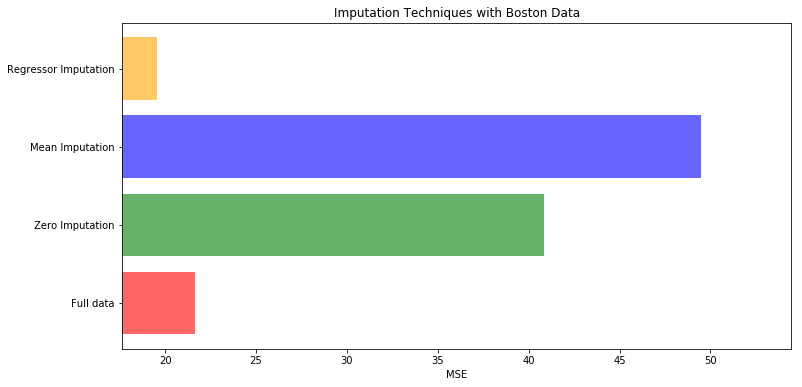

In [22]:
x_labels = ['Full data',
            'Zero Imputation',
            'Mean Imputation',
            'Regressor Imputation']
colors = ['r', 'g', 'b', 'orange']
 
plt.figure(figsize=(12, 6))#画出画布
ax = plt.subplot(111)#添加子图
for i in np.arange(len(mse)):#range(mse)
    ax.barh(i, mse[i],color=colors[i], alpha=0.6, align='center')#bar为条形图，barh为横向条形图，alpha表示条的粗度
ax.set_title('Imputation Techniques with Boston Data')
ax.set_xlim(left=np.min(mse) * 0.9,
             right=np.max(mse) * 1.1)#设置x轴取值范围
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.set_yticklabels(x_labels)
plt.show()